In [ ]:
import pickle

#imgs und gts
imgs_20xRenamed = []
with open('save_data/3D_images_Renamed/imgs_20xRenamed.pkl', 'rb') as f:
    imgs_20xRenamed = pickle.load(f)
gt_3D_relabelled = []
with open('save_data/gt_relabeled/gt_3D_relabelled.pkl', 'rb') as f:
    gt_3D_relabelled = pickle.load(f)

#masken
masks3D = []
with open('save_data/masks/masks3D.pkl', 'rb') as f:
    masks3D = pickle.load(f)
masks3D_nnUNet_Instances = []
with open('save_data/masks/masks3D_nnUNet_Instances_relabeled.pkl', 'rb') as f:
    masks3D_nnUNet_Instances = pickle.load(f)
masks3D_Deepcell = []
with open('save_data/masks/masks3D_Deepcell.pkl', 'rb') as f:
    masks3D_Deepcell = pickle.load(f)
masks3D_20xRenamed = []
with open('save_data/masks/20xRenamed/masks3D_CELLPOSE_RUN_1.pkl', 'rb') as f:
    masks3D_20xRenamed = pickle.load(f)
masks_LabelingApp = []
with open('Labeling_App/helpers/masks3D_CELLPOSE_RUN_1_Quadrants.pkl', 'rb') as f:
    masks_LabelingApp = pickle.load(f)
normalized_channels = []
with open('Labeling_App/helpers/normalized_channels.pkl', 'rb') as f:
    normalized_channels = pickle.load(f)

masks_LabelingApp_r = []
with open('Labeling_App/helpers/Aufteilung_Labeling_App/rüdiger/masks3D_CELLPOSE_RUN_1_Quadrants.pkl', 'rb') as f:
    masks_LabelingApp_r = pickle.load(f)
normalized_channels_r = []
with open('Labeling_App/helpers/Aufteilung_Labeling_App/rüdiger/normalized_channels.pkl', 'rb') as f:
    normalized_channels_r = pickle.load(f)

for i, gt in enumerate(gt_3D_relabelled):
    if masks3D[i].shape != gt.shape:
        print(masks3D[i].shape)
    if masks3D_nnUNet_Instances[i].shape != gt.shape:
        print(masks3D_nnUNet_Instances[i].shape)    

#Labels And IoUs
best_IoUs_3D_Cellpose = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_Cellpose.pkl', 'rb') as f:
    best_IoUs_3D_Cellpose = pickle.load(f)
best_labels_3D_Cellpose = []
with open('save_data/LabelsAndIoUs/best_labels_3D_Cellpose.pkl', 'rb') as f:
    best_labels_3D_Cellpose = pickle.load(f)

best_IoUs_3D_nnU = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_nnU.pkl', 'rb') as f:
    best_IoUs_3D_nnU = pickle.load(f)
best_labels_3D_nnU = []
with open('save_data/LabelsAndIoUs/best_labels_3D_nnU.pkl', 'rb') as f:
    best_labels_3D_nnU = pickle.load(f)

best_IoUs_3D_Deepcell = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_Deepcell.pkl', 'rb') as f:
    best_IoUs_3D_Deepcell = pickle.load(f)
best_labels_3D_Deepcell = []
with open('save_data/LabelsAndIoUs/best_labels_3D_Deepcell.pkl', 'rb') as f:
    best_labels_3D_Deepcell = pickle.load(f)


In [9]:
print(len(normalized_channels_r))
print(normalized_channels_r[0].shape)
print(masks_LabelingApp[0].shape)

2
(63, 1024, 1024, 4)
(28, 1024, 1024)


In [5]:
print(len(imgs_20xRenamed))

22


In [2]:
img = masks3D_20xRenamed[5]
print(img.shape)

(17, 1024, 1024)


(29, 4, 1024, 1024)


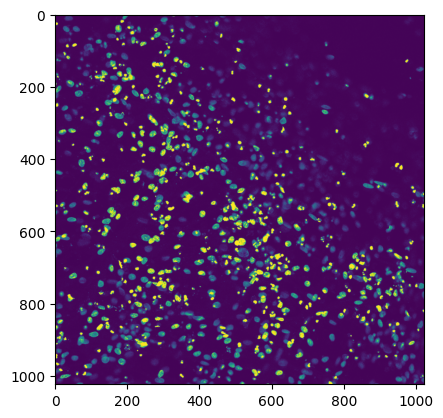

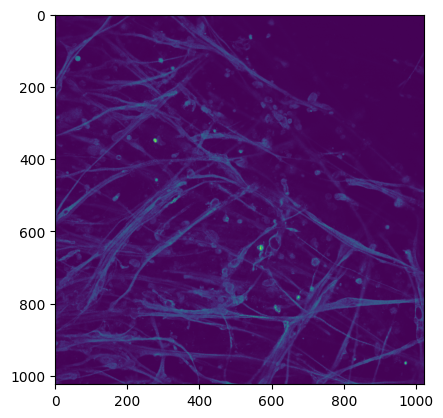

In [10]:
import matplotlib.pyplot as plt
from scipy.ndimage import label
from skimage.measure import regionprops
import numpy as np

img = imgs_20xRenamed[1]
print(img.shape)
plt.imshow(img[12,0,:,:])
plt.show()
plt.imshow(img[12,1,:,:])
plt.show()
plt.imsave('my_test.png', img[12,1,:,:], cmap='gray')
plt.imsave('nc_test.png', img[12,0,:,:], cmap='gray')

#binary = img[8,:,:] >= 1
#plt.imshow(binary)
#plt.show()
#labeled, _ = label(binary)
#props = regionprops(labeled)#

#sizes = [prop.area for prop in props]  
#print(np.average(sizes))
#diameters = [np.cbrt(p.area) for p in props]  
#print(np.average(diameters))
#diameters = [np.sqrt(p.area) for p in props]
#print(np.average(diameters))

In [ ]:
#import re
#import os
#import tifffile as tif
#
#imgs_20xRenamed = []
#save_dir = "20xRenamed/20xRenamed"
#image_ext = ".tif"
## Get all .tif files
#image_files = [file for file in os.listdir(save_dir) if file.endswith(image_ext) if file.startswith('img')]
#
#def extract_number(filename):
#    match = re.match(r"img_(\d+)\\.tif", filename)
#    return int(match.group(1)) if match else float('inf')
#
#image_files_sorted = sorted(image_files, key=extract_number)
#
## Load images in sorted order
#for file in image_files_sorted:
#    img = tif.imread(os.path.join(save_dir, file))
#    print(f"image shape {img.shape} in {file}")
#    imgs_20xRenamed.append(img)

In [ ]:
from Labeling_App.helpers.blob_data_helper import BlobDataHelper
blb = BlobDataHelper()

In [44]:
import importlib
import Labeling_App.helpers.blob_data_helper
importlib.reload(Labeling_App.helpers.blob_data_helper)

from Labeling_App.helpers.blob_data_helper import BlobDataHelper, get_next_undef
blb = BlobDataHelper()


In [ ]:
#print(np.unique(masks3D_20xRenamed[3])) ->2128
import matplotlib.pyplot as plt
import numpy as np
slice = 3
bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(image_index=0, blob_index=7)
print(inside_box)
print(bbox.shape)
print(edge_blob)
if 3 > bbox.shape[0]:
    slice = bbox.shape[0] - 1
if 1 == bbox.shape[0]:
    slice = 0
plt.imshow(bbox[slice,:,:])
plt.show()

In [142]:
import importlib
import Labeling_App.helpers.visualization_helper
importlib.reload(Labeling_App.helpers.visualization_helper)

from Labeling_App.helpers.visualization_helper import plot_image_with_clustered_contours_RGB

In [143]:
import importlib
import helpers.features_helper
importlib.reload(helpers.features_helper)

from helpers.features_helper import extract_features_and_contours, cluster_features
import numpy as np

In [ ]:
image_index = 13
slice = 15
mask = masks3D_20xRenamed[image_index][slice,:,:]
img = imgs_20xRenamed[image_index][slice, 0:2, :, :]
print(img.shape)
img_reshaped = img.transpose(1, 2, 0) 
print(img_reshaped.shape)
img_rgb = np.concatenate([img_reshaped.astype(np.uint8), np.zeros((1024, 1024, 1), dtype=np.uint8)], axis=2)
print(img_rgb.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb[:,:,:])
plt.axis("off")
plt.show()

In [118]:
contours_with_features = extract_features_and_contours(mask)

In [147]:
contours_with_classes = cluster_features(contours_with_features, k=3)

511
511


In [ ]:
print("Available labels:", list(contours_with_features.keys()))


In [ ]:
label = 25
#print("Combined contour points for label", label)
#print(contours_with_features[label]['contours'])

# Print the features list
print(f"the {len(contours_with_classes[label]['features'])} Features for label {label}")
print(contours_with_classes[label]['features'])
print(f"make it class: {contours_with_classes[label]['class']}")

contour = contours_with_classes[label]['contours']

plt.plot(contour[:, 1], contour[:, 0], '-o')  # X=cols, Y=rows
plt.gca().invert_yaxis()  # Optional: to match image coordinates
plt.title(f'Contour for label {label}')
plt.axis('equal')
plt.show()
plt.imshow(mask == label)
plt.show()

In [ ]:
plot_image_with_clustered_contours_RGB(img_rgb, contours_with_classes=contours_with_classes)


In [ ]:
blobs_per_image = [len(np.unique(mask)) for mask in masks3D_20xRenamed]

In [ ]:
print(len(blobs_per_image))
print(blobs_per_image[0])

In [69]:
import json, os
def label_all_img0(blob_count):
    label_store = {"img0": {str(i): 1 for i in range(1, blob_count + 1)}}
    with open("label_store.json", "w") as f:
        json.dump(label_store, f, indent=2)
label_all_img0(2375)

In [ ]:
SAVE_FILE = "label_store.json"
SAVE_INTERVAL = 3
save_counter = 0
# ---- Load Label Store ----
if os.path.exists(SAVE_FILE):
    with open(SAVE_FILE, 'r') as f:
        label_store = json.load(f)
    print(get_next_undef(label_store))

In [ ]:
all_shapes = []
for k in range(len(masks3D_20xRenamed)):
    print(f"***************** IMAGE {k} *****************")
    shapes = []
    length = len(np.unique(masks3D_20xRenamed[k]))
    for i in range(1, length):
        if i % 100 == 0:
            print(f"iteration {i} von {length}")
        bbox, blob_index, image_index, edge_blob = blb.get_blob(image_index=0, blob_index=i, offset=0)
        if not edge_blob:
            shapes.append(bbox.shape)
    all_shapes.append(shapes)

In [33]:
import pickle 
with open('all_shapes.pkl', 'wb') as handle:
    pickle.dump(all_shapes, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
import numpy as np

for idx, shape_list in enumerate(all_shapes):
    x_sizes = [shape[1] for shape in shape_list]
    y_sizes = [shape[2] for shape in shape_list]

    x_sizes = np.array(x_sizes)
    y_sizes = np.array(y_sizes)

    top5_x = np.sort(x_sizes)[-5:][::-1]
    top5_y = np.sort(y_sizes)[-5:][::-1]

    mean_x = np.mean(x_sizes)
    mean_y = np.mean(y_sizes)

    print(f"Shape List {idx}:")
    print("  Top 5 X sizes:", top5_x)
    print("  Top 5 Y sizes:", top5_y)
    print("  Mean X size:", mean_x)
    print("  Mean Y size:", mean_y)
    print()


In [ ]:
import importlib
import Labeling_App.helpers.blob_data_helper
importlib.reload(Labeling_App.helpers.blob_data_helper)
from Labeling_App.helpers.blob_data_helper import sort_cells_by_position, get_quadrant_cutoffs, BlobDataHelper, normalize_channel
from Labeling_App.helpers.visualization_helper import normalize_with_cutoffs

In [38]:
#(sorted_msks, mapping_msks) = sort_cells_by_position()
cutoffs = get_quadrant_cutoffs(mapping_msks)
import pickle 
with open('quadrant_cutoffs.pkl', 'wb') as handle:
    pickle.dump(cutoffs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:

print(cutoffs[0]['Q1_max'])


594


In [ ]:
import matplotlib.pyplot as plt
blb = BlobDataHelper()

bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(0,594, selected_channels=[1])
full_image, (x_min_abs, x_max_abs, y_min_abs, y_max_abs, z_min, z_max) = blb.get_fullscreen_for_current_blob(1)
print(np.max(full_image))
plt.imshow(normalize_with_cutoffs(full_image, 3, 97))
plt.show()
#plt.imshow(bbox[1,:,:,:])
#plt.show()
bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(0,594, selected_channels=[2])
full_image, (x_min_abs, x_max_abs, y_min_abs, y_max_abs, z_min, z_max) = blb.get_fullscreen_for_current_blob(1)
plt.imshow(normalize_with_cutoffs(full_image, 3, 97))
plt.show()
#plt.imshow(bbox[1])
#plt.show()
bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(0,594, selected_channels=[1,2])
full_image, (x_min_abs, x_max_abs, y_min_abs, y_max_abs, z_min, z_max) = blb.get_fullscreen_for_current_blob(1)
plt.imshow(normalize_with_cutoffs(full_image, 3, 97))
plt.show()
#plt.imshow(bbox[1])
#plt.show()

In [ ]:
import importlib
import Labeling_App.helpers.blob_data_helper
importlib.reload(Labeling_App.helpers.blob_data_helper)
from Labeling_App.helpers.blob_data_helper import sort_cells_by_position, get_quadrant_cutoffs, BlobDataHelper, normalize_channel
normalized_channels = []
i= 0
for full_img in imgs_20xRenamed:
    print(f"preprocessing image {i}")
    i+=1
    ch0 = normalize_channel(full_img[:, 0, :, :])
    ch1 = normalize_channel(full_img[:, 1, :, :])
    ch2 = normalize_channel(full_img[:, 2, :, :])
    ch3 = normalize_channel(full_img[:, 3, :, :])

    # Stack into shape: (Z, X, Y, C) for fast slicing later
    img = np.stack([ch0, ch1, ch2, ch3], axis=-1)  # shape: (Z, X, Y, 4)
    normalized_channels.append(img)


In [14]:
print(len(normalized_channels))

22


In [13]:
import pickle 
with open('normalized_channels.pkl', 'wb') as handle:
    pickle.dump(normalized_channels, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
path = "C:\\Users\\david\\Documents\\Uni\\Masterarbeit\\results_classifier.csv"

In [26]:
df = pd.read_csv(path)
df['Accuracy'] = df['Accuracy'].astype(str).str.replace(',', '.').astype(float)

keys = ['imageNet', 'none', 'Only pseudo', 'Pseudo + Transfer']
for key in keys:
    print(key)
    df_key = df[df['Pretrain'] == key]
    print(df_key['Accuracy'])

imageNet
0     0.72917
1     0.84896
2     0.79427
3     0.83594
4     0.78646
5     0.81771
6     0.81771
7     0.83073
8     0.83594
9     0.82552
10    0.82292
11    0.83854
12    0.69271
13    0.82552
14    0.78385
15    0.81250
16    0.77083
17    0.80990
18    0.71094
19    0.70833
20    0.80208
21    0.79948
22    0.76562
23    0.77865
Name: Accuracy, dtype: float64
none
24    0.85938
25    0.81771
26    0.78646
27    0.75260
28    0.50000
Name: Accuracy, dtype: float64
Only pseudo
29    0.63814
30    0.61639
31    0.57813
32    0.42609
33    0.38542
Name: Accuracy, dtype: float64
Pseudo + Transfer
34    0.81510
35    0.79167
36    0.63021
37    0.81771
38    0.42969
Name: Accuracy, dtype: float64


In [39]:
grouped = (
    df[
        (df['Encoder'] != "SAM") &
        (df['Decoder'] == "3D") &
        (df['Mask Channel'] == "Ch0 Mask")
    ]
    .groupby(['Pretrain', 'Parameter'], as_index=False)
    .agg({'Accuracy': 'mean'})
)

print(grouped)

             Pretrain  Parameter  Accuracy
0         Only pseudo   11700000   0.63814
1         Only pseudo   44500000   0.61639
2         Only pseudo   87900000   0.38542
3         Only pseudo  118500000   0.57813
4         Only pseudo  197800000   0.42609
5   Pseudo + Transfer   11700000   0.81510
6   Pseudo + Transfer   44500000   0.79167
7   Pseudo + Transfer   87900000   0.42969
8   Pseudo + Transfer  118500000   0.63021
9   Pseudo + Transfer  197800000   0.81771
10           imageNet   11700000   0.83594
11           imageNet   44500000   0.81771
12           imageNet   87900000   0.83854
13           imageNet  118500000   0.83073
14           imageNet  197800000   0.82552
15               none   11700000   0.85938
16               none   44500000   0.81771
17               none   87900000   0.50000
18               none  118500000   0.78646
19               none  197800000   0.75260


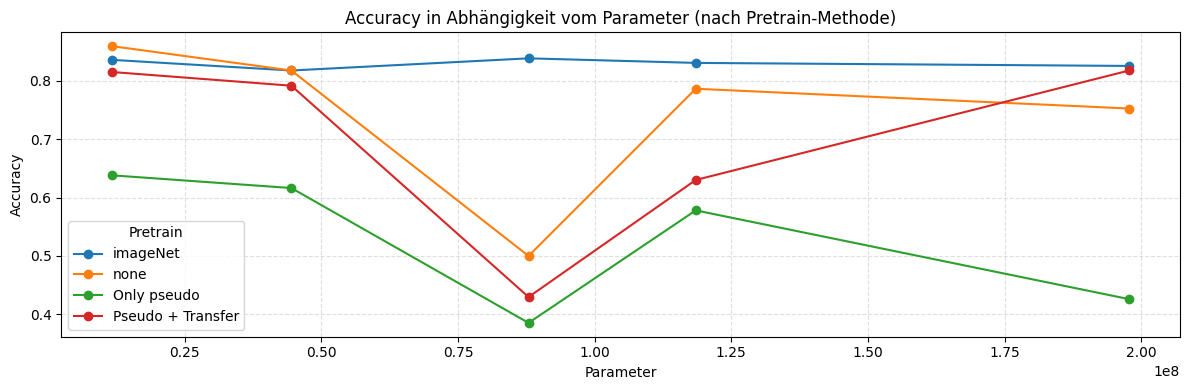

In [41]:
plt.figure(figsize=(12, 4))
for key in keys:
    df_key = grouped[grouped['Pretrain'] == key]
    plt.plot(df_key['Parameter'], df_key['Accuracy'], marker='o', label=key)

plt.title("Accuracy in Abhängigkeit vom Parameter (nach Pretrain-Methode)")
plt.xlabel("Parameter")
plt.ylabel("Accuracy")
plt.legend(title="Pretrain")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('Parameter_V_Pretrain.svg', dpi=300)
plt.show()

In [42]:
from scipy.stats import spearmanr

for key in keys:
    df_key = grouped[grouped['Pretrain'] == key]
    corr, p = spearmanr(df_key['Parameter'], df_key['Accuracy'])
    print(f"{key}: Spearman r = {corr:.2f}, p = {p:.3f}")


imageNet: Spearman r = -0.20, p = 0.747
none: Spearman r = -0.70, p = 0.188
Only pseudo: Spearman r = -0.70, p = 0.188
Pseudo + Transfer: Spearman r = 0.10, p = 0.873


Gesamt (alle Pretrain zusammen): Spearman r = -1.00, p = 0.000000
   Parameter  Accuracy
0   11700000  0.787140
1   44500000  0.760870
2  118500000  0.706383
3  197800000  0.705480


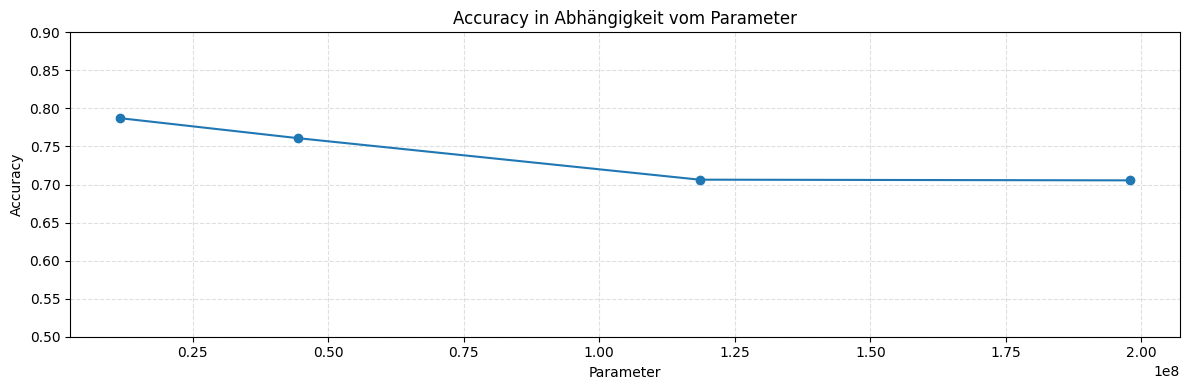

In [62]:
grouped2 = (
    df[
        (df['Decoder'] == "3D") &
        (df['Mask Channel'] == "Ch0 Mask") &
        #(df['Pretrain'] != "imageNet")
        (df['Encoder'] != "SAM") &
        (df['Encoder'] != "Swin")
    ]
    .groupby(['Parameter'], as_index=False)
    .agg({'Accuracy': 'mean'})
)

corr, p = spearmanr(grouped2['Parameter'], grouped2['Accuracy'])
print(f"Gesamt (alle Pretrain zusammen): Spearman r = {corr:.2f}, p = {p:.6f}")
print(grouped2)
plt.figure(figsize=(12, 4))
plt.plot(grouped2['Parameter'], grouped2['Accuracy'], marker='o', label=key)

plt.title("Accuracy in Abhängigkeit vom Parameter")
plt.xlabel("Parameter")
plt.ylabel("Accuracy")
plt.ylim(0.5,0.9)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
#plt.savefig('Parameter_V_acc.svg', dpi=300)
plt.show()

In [52]:
from scipy.stats import spearmanr

corr, p = spearmanr(grouped2['Parameter'], grouped2['Accuracy'])
print(f"Gesamt (alle Pretrain zusammen): Spearman r = {corr:.2f}, p = {p:.3f}")


Gesamt (alle Pretrain zusammen): Spearman r = -1.00, p = 0.000


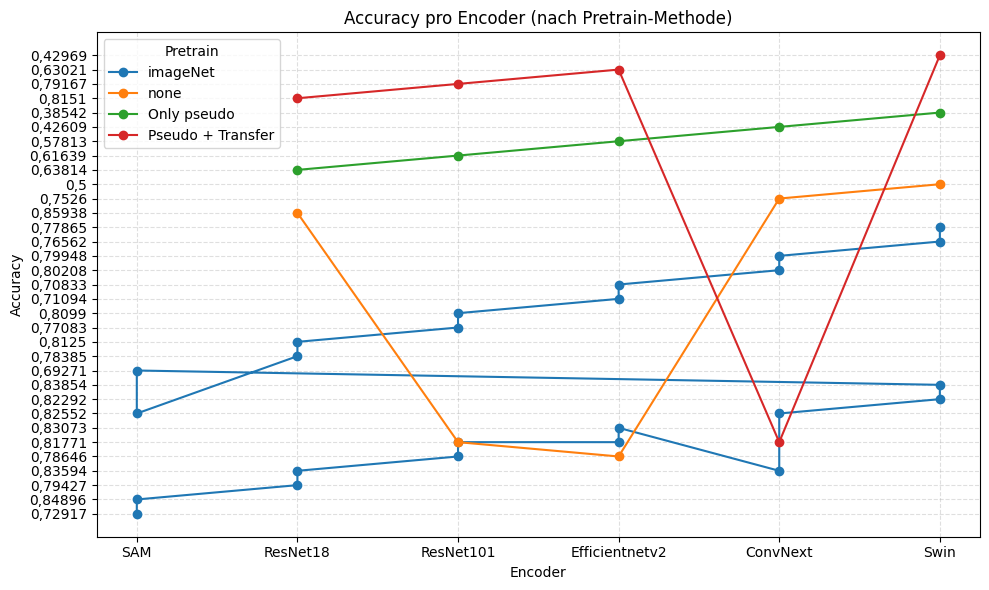

In [ ]:
plt.figure(figsize=(10, 6))

for key in keys:
    df_key = df[df['Pretrain'] == key]
    df_key_no_SAM = df_key[df_key['Encoder'] != "SAM"]
    plt.plot(df_key_no_SAM['Encoder'], df_key_no_SAM['Accuracy'], marker='o', label=key)

plt.title("Accuracy pro Encoder (nach Pretrain-Methode)")
plt.xlabel("Encoder")
plt.ylabel("Accuracy")
plt.legend(title="Pretrain")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
